In [1]:
import sys
from api.api import *
from datetime import datetime, timedelta
from helper import *
import json
import plotly.graph_objects as go

In [2]:
live_trades= get_eth_eur_values(from_dt_str="now()-10d")
df = create_candlesticks(live_trades)
df_new = add_simple_moving_average_to_df(df, 10, 'low')
df_new = add_simple_moving_average_to_df(df, 10, 'high')
df_ssl = calculate_ssl_channel(df, 10, 10)

type(result_points[idx]) <class 'dict'>


In [3]:
df_ssl

,timestamp_utc,low,high,open,close,sma_low_10,sma_high_10,hlv,ssl_down,ssl_up,trend
0,2021-07-09 21:10:00+00:00,1794.09,1795.57,1795.57,1794.09,NaN,NaN,0,NaN,NaN,none
1,2021-07-12 19:35:00+00:00,1698.19,1702.55,1700.00,1702.55,NaN,NaN,0,NaN,NaN,none
2,2021-07-12 19:40:00+00:00,1700.00,1707.21,1703.59,1700.00,NaN,NaN,0,NaN,NaN,none
3,2021-07-12 19:45:00+00:00,1696.62,1701.38,1700.31,1698.59,NaN,NaN,0,NaN,NaN,none
4,2021-07-12 19:50:00+00:00,1700.99,1705.67,1702.46,1702.35,NaN,NaN,0,NaN,NaN,none
5,2021-07-12 19:55:00+00:00,1701.52,1705.53,1702.76,1704.03,NaN,NaN,0,NaN,NaN,none
6,2021-07-12 20:00:00+00:00,1696.00,1704.59,1703.49,1696.00,NaN,NaN,0,NaN,NaN,none
7,2021-07-12 20:05:00+00:00,1696.62,1702.43,1698.70,1702.43,NaN,NaN,0,NaN,NaN,none
8,2021-07-12 20:10:00+00:00,1700.98,1708.33,1700.98,1708.33,NaN,NaN,0,NaN,NaN,none
9,2021-07-12 20:15:00+00:00,1708.96,1716.10,1708.96,1711.53,1709.397,1714.936,0,1709.397,1714.936,up


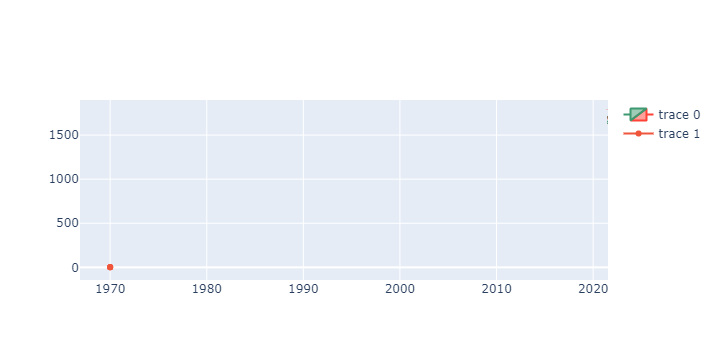

In [8]:
fig = go.Figure(data=[go.Candlestick(x=df_ssl['timestamp_utc'],
            open=df_ssl['open'], high=df_ssl['high'],
            low=df_ssl['low'], close=df_ssl['close'])
            ,go.Scatter()
                 ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()